[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


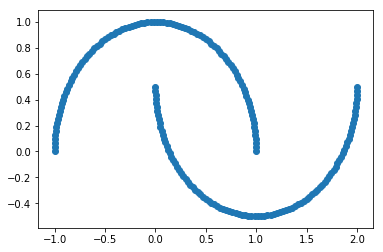

In [1]:
from matplotlib import pyplot as plt
from train_mlp_numpy import *
from modules import CrossEntropy, Optimizer

TRAIN_SIZE = 160
TEST_SIZE = 40
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 200
EVAL_FREQ_DEFAULT = 10

# genereate data
X, y = data_generate(TRAIN_SIZE+TEST_SIZE)

# make label to one-hot
label = np.zeros((len(y), 2))
label[np.arange(len(y)), y] = 1
print(label[:10])

plt.scatter(X[:,0], X[:,1])
plt.show()
plt.close()

# split data
train_data = X[:TRAIN_SIZE]
train_label = label[:TRAIN_SIZE]
test_data = X[TRAIN_SIZE:]
test_label = label[TRAIN_SIZE:]

In [2]:
# define network
hidden_units = list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split(',')))
mlp = MLP(2, hidden_units, 2)

# define loss function and optimizer
optimizer = Optimizer(mlp, LEARNING_RATE_DEFAULT)
loss_func = CrossEntropy()

In [3]:
# Train
train_scores, train_losses, test_scores, test_losses = train(mlp, optimizer, loss_func, train_data, train_label, test_data, test_label, 10)

epoch 10: train loss 0.6927090965835925; train acc 0.50625; test loss 0.6931492490707323 test acc 0.475
epoch 20: train loss 0.6919364268328705; train acc 0.50625; test loss 0.6924976004382105 test acc 0.475
epoch 30: train loss 0.6899241138226482; train acc 0.50625; test loss 0.690489110941783 test acc 0.475
epoch 40: train loss 0.6845958928901072; train acc 0.70625; test loss 0.6849396370341507 test acc 0.7
epoch 50: train loss 0.6708129484074505; train acc 0.79375; test loss 0.6705059826070144 test acc 0.925
epoch 60: train loss 0.6381491061757663; train acc 0.80625; test loss 0.636127609927223 test acc 0.85
epoch 70: train loss 0.5751447380508651; train acc 0.80625; test loss 0.5694800651319567 test acc 0.85
epoch 80: train loss 0.4898625861601527; train acc 0.81875; test loss 0.47880729875024686 test acc 0.85
epoch 90: train loss 0.4129175508231797; train acc 0.825; test loss 0.3973494714818333 test acc 0.85
epoch 100: train loss 0.36003831457337493; train acc 0.84375; test loss 0

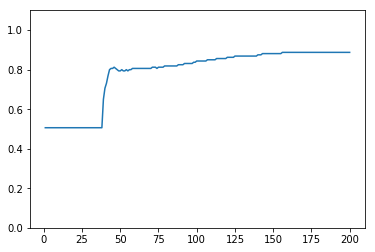

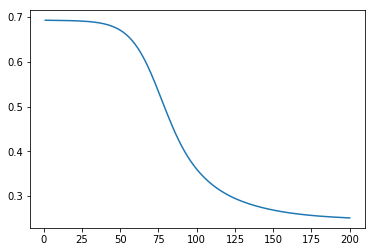

In [4]:
epochs = [i for i in range(1, int(MAX_EPOCHS_DEFAULT) + 1)]

# train accuracy curve
acc_plot = plt.plot(epochs, train_scores)
plt.ylim([0, 1.1])
plt.show()
plt.close()

# train loss curve
losses = plt.plot(epochs, train_losses)
plt.show()
plt.close()

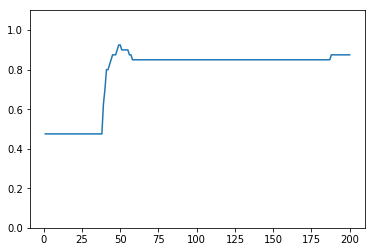

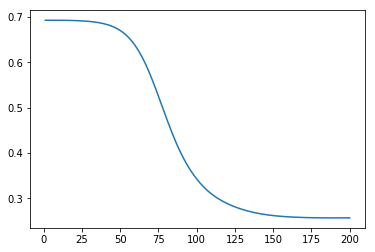

In [5]:
# test accuracy curve
acc_plot = plt.plot(epochs, test_scores)
plt.ylim([0, 1.1])
plt.show()
plt.close()

# test loss curve
losses = plt.plot(epochs, test_losses)
plt.show()
plt.close()